# 10/05 - Pair Programming Limpieza 1 - Guadalupe & Lara

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import regex as re
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
df = df = pd.read_csv("ataques_enproceso_2.csv")

In [23]:
df.head()

,Unnamed: 0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
0,0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018
2,2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,unspecified,N,Injury to left lower leg from surfboard skeg,09-Jun-2018
3,3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,unspecified,N,Minor injury to lower leg,08-Jun-2018
4,4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,tiger_shark,N,Lacerations to leg & hand shark PROVOKED INCIDENT,04-Jun-2018


In [24]:
df.shape

(6288, 16)

Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

-*¿Sobre que columnas podremos eliminar o reemplazar los outliers?*



In [25]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

,Unnamed: 0,year
0,0,2018.0
1,1,2018.0


-*Identifica visualmente los outlier.*



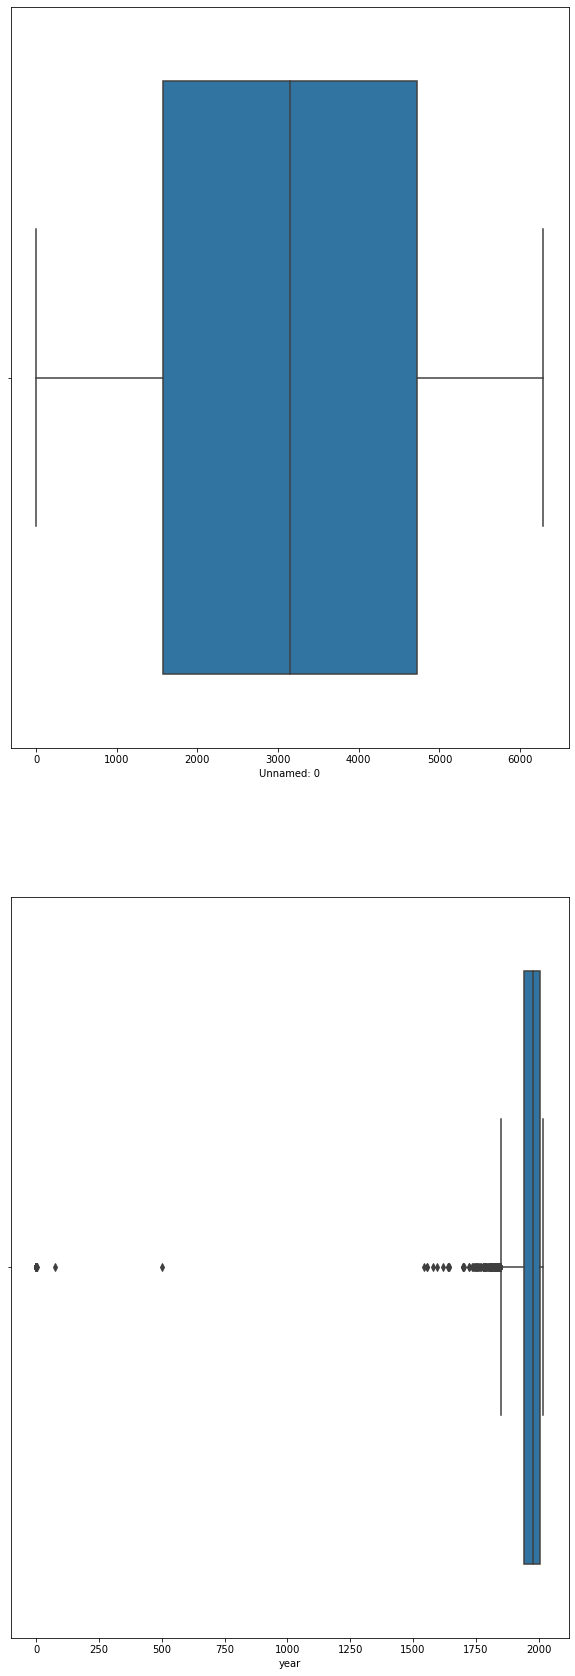

In [26]:
# Tenemos 2 columnas, que prodrían ser 3 cuando completemos "new_age"
fig, ax = plt.subplots(2, 1, figsize=(10,30))
0
for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

-*Identifica sobre el dataframe las filas que son outliers*


In [27]:
Q1 = np.nanpercentile(df['year'], 25)
Q1

1942.0

In [28]:
# cálculo del Q3
Q3 = np.nanpercentile(df['year'], 75)
Q3

2005.0

In [29]:
#calculemos el IQR 

IQR = Q3 - Q1
IQR

63.0

In [30]:
# multiplicamos el IQR por 1.5

outlier_step = 1.5 * IQR
outlier_step

94.5

In [ ]:
outliers_data = df[(df["year"] < Q1 - outlier_step) | (df["year"] > Q3 + outlier_step)]
outliers_data.head(10)

In [35]:
Q1 = np.nanpercentile(df['year'], 25)
Q3 = np.nanpercentile(df['year'], 75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR
outliers_data = df[(df["year"] < Q1 - outlier_step) | (df["year"] > Q3 + outlier_step)]
outliers_data.head(2)


,Unnamed: 0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
6022,6022,1847.11.30,1847.0,Unprovoked,australia,Queensland,Brisbane River,Swimming,James Stewart,M,NaN,NaN,unspecified,N,Thigh & calf bitten,30-Nov-1847
6023,6023,1847.09.10,1847.0,Unprovoked,usa,Massachusetts,"Chelsea Beach, Suffolk County",Wading,Amos Thompson,M,NaN,NaN,unspecified,N,Lacerations to arm,10-Sep-1847


In [32]:
outliers_data.shape

(261, 16)

In [ ]:
# sacamos los índices de los outliers 
lista_out = list(outliers_data.index)
lista_out 

In [ ]:
#Funcion para cuando podamos usar "new age"
# def detectar_outliers(lista_columnas, dataframe): 
    
#     dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
#     # iteramos por la lista de las columnas numéricas de nuestro dataframe
#     for col in lista_columnas:
        
#         #calculamos los cuartiles Q1 y Q3
#         Q1 = np.nanpercentile(df[col], 25)
#         Q3 = np.nanpercentile(df[col], 75)
        
#         # calculamos el rango intercuartil
#         IQR = Q3 - Q1
        
#         # calculamos los límites
#         outlier_step = 1.5 * IQR
        
#         # filtramos nuestro dataframe para indentificar los outliers
#         outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
#         if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
#             dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
#     return dicc_indices 

In [ ]:
# aplicamos la función y sacamos los índices de los outliers.

# ind = detectar_outliers(lista_columnas, df)

-*Reemplaza los outliers por el estadístico más correcto.*

-*Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.*